In [32]:
# # Finance Data Project 
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance --user

In [3]:
# In this data project I will focus on exploratory data analysis of stock prices. 
# This project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
# __
# I'll be focusing on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

In [5]:
style.use('ggplot')

#start = dt.datetime(2000,1,1)
#end = dt.datetime(2016,12,31)

#df = web.DataReader('TSLA', 'yahoo', start, end)
#print(df.head())

In [21]:
df.to_csv('tsla.csv')

In [6]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col=0)
#
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

print(df_ohlc.head())

       Date   open   high    low  close
0  733952.0  4.778  4.778  3.160  3.492
1  733962.0  3.480  4.128  3.410  4.128
2  733972.0  4.382  4.382  4.044  4.144
3  733982.0  4.070  4.390  3.918  3.918
4  733992.0  3.920  3.920  3.520  3.830


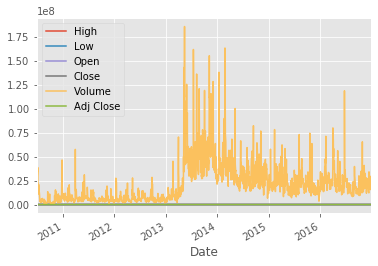

In [25]:
df.plot()
plt.show()

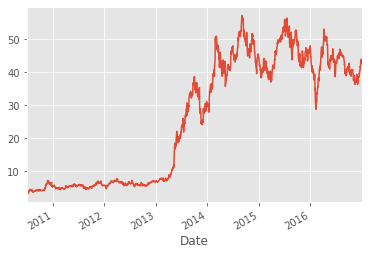

In [27]:
# All we see is volume 
# Lets try showing something else
df['Adj Close'].plot()

In [28]:
print(df[['Open', 'High']].head())

             Open   High
Date                    
2010-06-29  3.800  5.000
2010-06-30  5.158  6.084
2010-07-01  5.000  5.184
2010-07-02  4.600  4.620
2010-07-06  4.000  4.000


In [34]:
#df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()


             High    Low   Open  Close   Volume  Adj Close     100ma
Date                                                                
2010-11-17  6.150  5.722  6.040  5.898  3750000      5.898  5.898000
2010-11-18  6.148  5.784  6.134  5.978  4780500      5.978  5.938000
2010-11-19  6.274  5.940  6.032  6.198  5752500      6.198  6.024667
2010-11-22  6.690  6.300  6.314  6.680  7648500      6.680  6.188500
2010-11-23  7.136  6.438  6.658  6.914  7889000      6.914  6.333600


In [33]:
#df.dropna(inplace=True)    ### We can use this, or min_periods=0 from above
#print(df.head())

             High    Low   Open  Close   Volume  Adj Close    100ma
Date                                                               
2010-11-17  6.150  5.722  6.040  5.898  3750000      5.898  4.19758
2010-11-18  6.148  5.784  6.134  5.978  4780500      5.978  4.20958
2010-11-19  6.274  5.940  6.032  6.198  5752500      6.198  4.22390
2010-11-22  6.690  6.300  6.314  6.680  7648500      6.680  4.24678
2010-11-23  7.136  6.438  6.658  6.914  7889000      6.914  4.27752


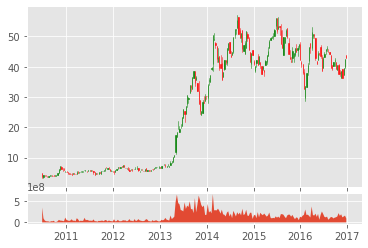

In [54]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

#ax1.plot(df.index, df['Adj Close'])
#ax1.plot(df.index, df['100ma'])
#ax2.plot(df.index, df['Volume'])

plt.show()

In [34]:
import bs4 as bs
import pickle
import requests
import os

def save_sp500_tickers():
    response = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(response.text, 'lxml')
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('\n',"")
        if "." in ticker:
            ticker = ticker.replace('.','-')
            print('ticker replaced to', ticker)
        tickers.append(ticker)
    
    with open("sp500tickers.pickle", "wb") as f:     ### wb = write bytes
        pickle.dump(tickers, f)
    
    print(tickers) 
    
    return tickers

save_sp500_tickers()

ticker replaced to BRK-B
ticker replaced to BF-B
['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO

In [35]:
def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:   ### rb = read bytes
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.get_data_yahoo(ticker, start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
get_data_from_yahoo()

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Already have AOS
APA
Already have APA
AIV
Already have AIV
AAPL
Alr

Already have VLO
VAR
Already have VAR
VTR
Already have VTR
VRSN
Already have VRSN
VRSK
Already have VRSK
VZ
Already have VZ
VRTX
Already have VRTX
VIAC
Already have VIAC
V
Already have V
VNT
VNO
VMC
WRB
WAB
WMT
WBA
DIS
WM
WAT
WEC
WFC
WELL
WST
WDC
WU
WRK
WY
WHR
WMB
WLTW
WYNN
XEL
XRX
XLNX
XYL
YUM
ZBRA
ZBH
ZION
ZTS


In [36]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        
        else:
            main_df = main_df.join(df,how='outer',on='Date')
            
        if count % 10 == 0:
            print(count)
    
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
    
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  Date        MMM       ABT  ABBV      ABMD  ACN      ATVI  \
2000-01-03  2000-01-03  25.852766  6.517454   NaN  18.25000  NaN  1.227554   
2000-01-04  2000-01-04  24.825493  6.331241   NaN  17.81250  NaN  1.190215   
2000-01-05  2000-01-05  25.544592  6.319605   NaN  18.00000  NaN  1.194882   
2000-01-06  2000-01-06  27.599115  6.540730   NaN  18.03125  NaN  1.171544   
2000-01-07  2000-01-07  28.146980  6.610564   NaN  17.93750  NaN  1.204217   

                 ADBE     AMD  AAP  ...  WYNN       XEL        XRX       XLNX  \
2000-01-03  16.274673  15.500  NaN  ...   NaN  7.682479  50.373814  33.169758   
2000-01-04  14.909401  14.625  NaN  ...   NaN  7.859379  48.030865  32.415897   
2000-01-05  15.204173  15.000  NaN  ...   NaN  8.162634  50.503986  31.706371   
2000-01-06  15

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.873293  0.816045  0.832679  0.910978  0.922934  0.781397   
ABT   0.873293  1.000000  0.832819  0.849593  0.984394  0.914670  0.954983   
ABBV  0.816045  0.832819  1.000000  0.855518  0.890523  0.921784  0.869332   
ABMD  0.832679  0.849593  0.855518  1.000000  0.877809  0.904345  0.878168   
ACN   0.910978  0.984394  0.890523  0.877809  1.000000  0.946725  0.947907   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM   0.124326  0.884995 -0.154537  ...  0.737914  0.897770  0.032027   
ABT   0.419921  0.821741 -0.032696  ...  0.613969  0.980157 -0.015789   
ABBV  0.716117  0.264003  0.565663  ...  0.051098  0.832064  0.155107   
ABMD  0.400375  0.694529  0.049438  ...  0.510231  0.839821  0.026272   
ACN   0.507497  0.843568  0.366899  ...  0.631563  0.988802  0.057692   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.778190 

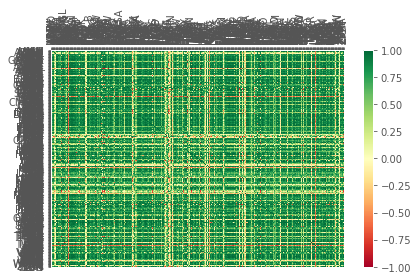

In [47]:
import numpy as np
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)    ## mark where companies line up, then add labels 
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)     ### color limit of heatmap
    
    plt.tight_layout()
    plt.show()

    
visualize_data()